In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#naikkan accuracy, turunkan loss
#port model ke h5, pke flask utk gateway, webnya .js
#tambah lagi dataset, min 1000/class di train, 150/class di val
#testing w/ 100 ep and 32 bs
#coba early stopping, monitor loss, patience 3
    
#set learning rate, batch size, optimizer to reduce spykiness in plot



In [2]:
train_dir = 'data3a/training'
val_dir = 'data3a/validation'

In [3]:
img_width, img_height = 150, 150

In [4]:
set_epoch = 50
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [7]:
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)
#stack layers sequentially
model = Sequential()

#1st
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_width, img_height, 3))) # 32 filters, 3x3 kernel size, (img width, img height,3) => 3 color channel (R,G,B)
model.add(MaxPooling2D((2, 2)))#add max pooling layer, 2d 2x2 size, for downsampling
#2nd
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
#3rd
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#flatten layer, to cnvrt 2D feature map to 1D  vector, reshape data
model.add(Flatten())
#add FCL, dense layer
model.add(Dense(128, activation='relu'))

#consider reducing dropout value
#dropout layer
model.add(Dropout(0.2))

# another FCN (dense layer), 3 neurons corresponds to each classes : minor, moderate, and severe (3), softmax output for multiclass pred
model.add(Dense(3, activation='softmax'))



#add three conv layers, conv layers for feature leaning and extraction

#add layer for test 
#model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))) # 32 filters, 3x3 kernel size, (img width, img height,3) => 3 color channel (R,G,B)
#model.add(MaxPooling2D((2, 2)))

#try to add 128 filters at beginning, consider add more filter at FCN 
#try to breakdown how to classify in each class (minor moderate severe), like what features are those to determine

#wira said that my case is more suitable to obj detection, not the classification, idk but yeah 
#also he said that coba gabung sub2bab di landasan teori, misal tf dan keras digabung, krn keras sdh include di tf, dll spy jl hal berkurang


In [8]:
opt = Adam(learning_rate=0.001)
callback = EarlyStopping(monitor='loss', patience=40, mode='min', start_from_epoch=0)

#find more compatible opt algo

In [9]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#find more compatible loss func

In [10]:
history = model.fit(train_generator, epochs=set_epoch, validation_data=val_generator, callbacks=callback)

Epoch 1/50
44/44 [==============================] - 24s 510ms/step - loss: 1.1660 - accuracy: 0.3413 - val_loss: 1.0753 - val_accuracy: 0.4476
Epoch 2/50
44/44 [==============================] - 21s 480ms/step - loss: 1.0688 - accuracy: 0.3955 - val_loss: 1.0802 - val_accuracy: 0.4556
Epoch 3/50
44/44 [==============================] - 22s 491ms/step - loss: 1.0633 - accuracy: 0.4295 - val_loss: 1.0109 - val_accuracy: 0.5040
Epoch 4/50
44/44 [==============================] - 22s 487ms/step - loss: 1.0551 - accuracy: 0.4570 - val_loss: 1.0030 - val_accuracy: 0.4839
Epoch 5/50
44/44 [==============================] - 20s 461ms/step - loss: 1.0016 - accuracy: 0.4881 - val_loss: 0.9463 - val_accuracy: 0.5161
Epoch 6/50
44/44 [==============================] - 21s 465ms/step - loss: 1.0507 - accuracy: 0.4440 - val_loss: 0.9049 - val_accuracy: 0.5605
Epoch 7/50
44/44 [==============================] - 24s 544ms/step - loss: 0.9864 - accuracy: 0.4953 - val_loss: 0.9679 - val_accuracy: 0.5202

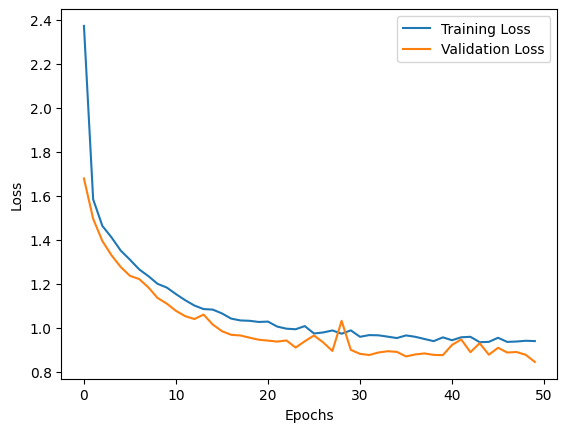

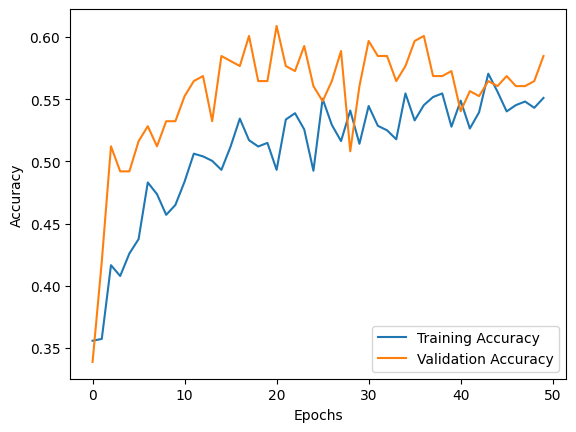

In [11]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

8/8 [==============================] - 2s 205ms/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_18560\3951721105.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
C:\Users\sandi\AppData\Local\Temp\ipykernel_18560\3951721105.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual


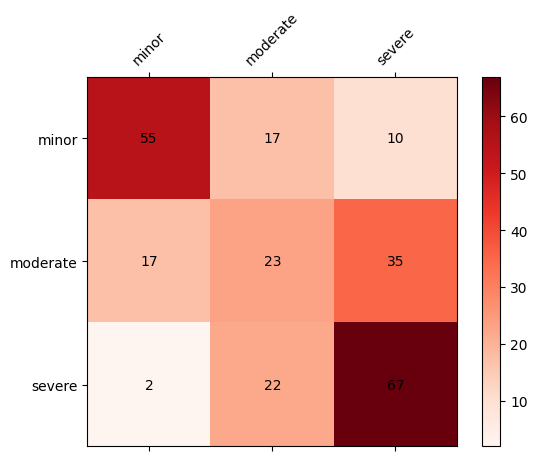

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.74      0.67      0.71        82
 02-moderate       0.37      0.31      0.34        75
   03-severe       0.60      0.74      0.66        91

    accuracy                           0.58       248
   macro avg       0.57      0.57      0.57       248
weighted avg       0.58      0.58      0.58       248



In [12]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)



from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [ ]:
model.save('baselineCNN-model.keras')
print('model saved')

1/1 [==============================] - 0s 39ms/step


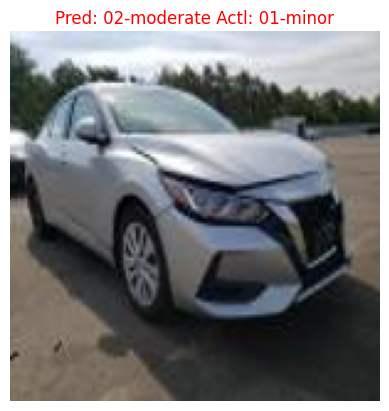

1/1 [==============================] - 0s 46ms/step


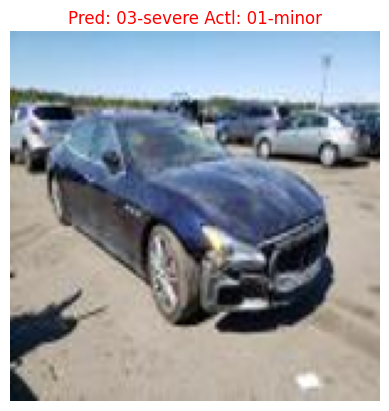

1/1 [==============================] - 0s 38ms/step


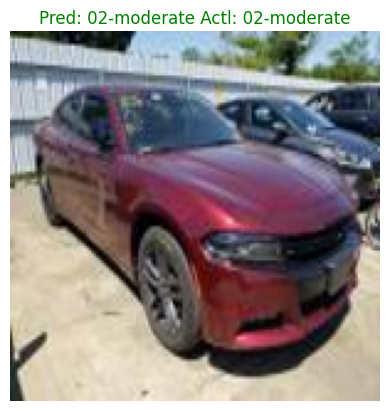

1/1 [==============================] - 0s 42ms/step


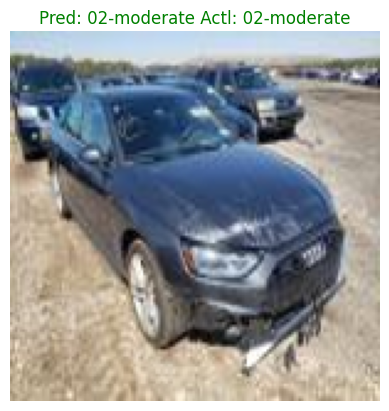

1/1 [==============================] - 0s 59ms/step


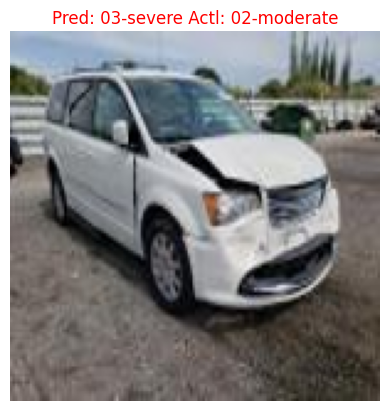

1/1 [==============================] - 0s 34ms/step


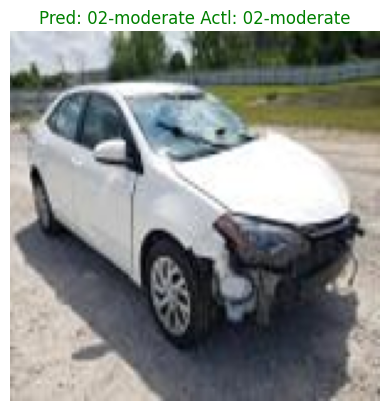

1/1 [==============================] - 0s 40ms/step


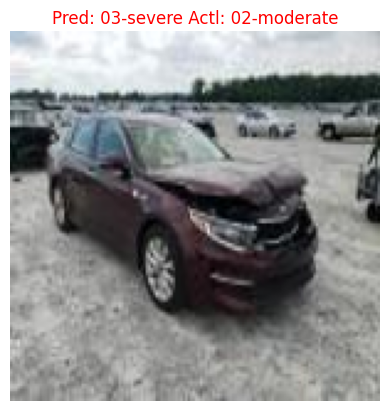

1/1 [==============================] - 0s 50ms/step


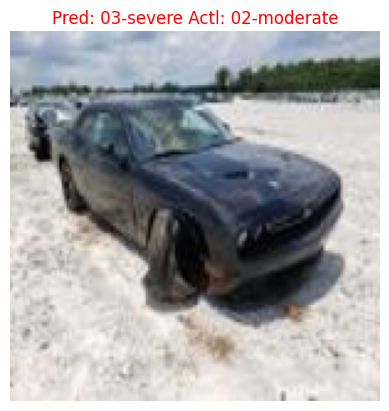

1/1 [==============================] - 0s 40ms/step


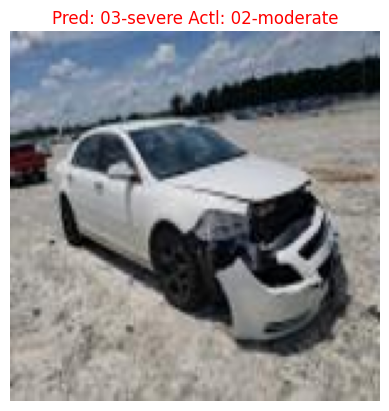

1/1 [==============================] - 0s 43ms/step


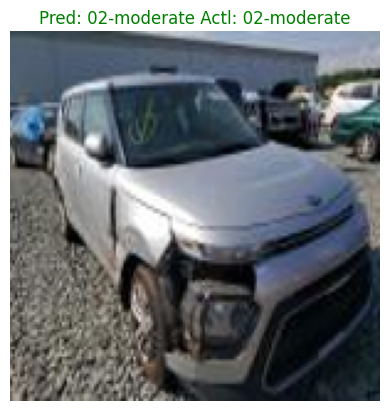

1/1 [==============================] - 0s 38ms/step


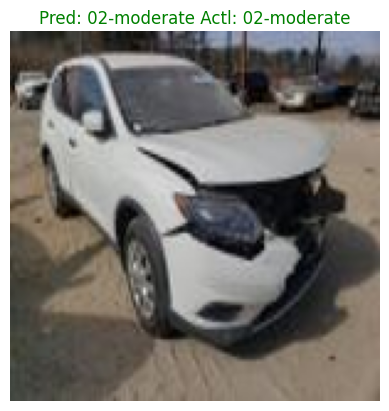

1/1 [==============================] - 0s 39ms/step


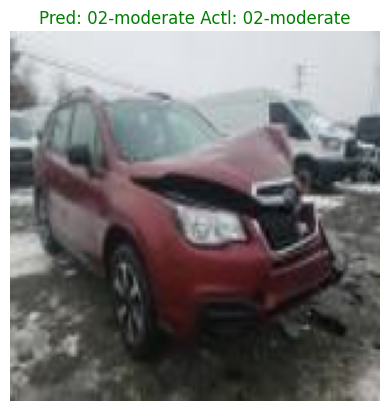

1/1 [==============================] - 0s 47ms/step


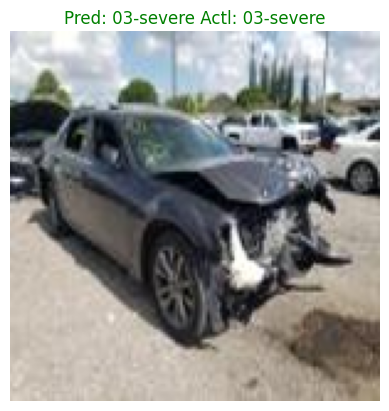

1/1 [==============================] - 0s 41ms/step


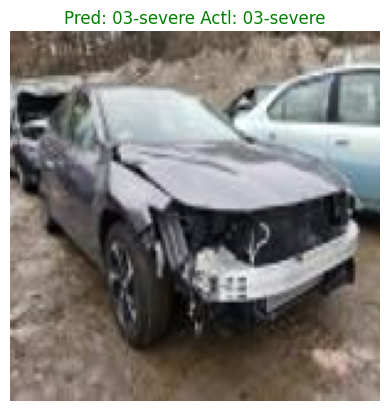

1/1 [==============================] - 0s 41ms/step


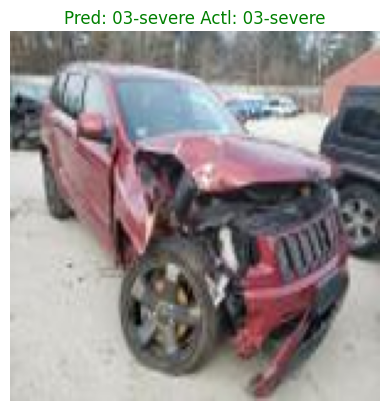

1/1 [==============================] - 0s 52ms/step


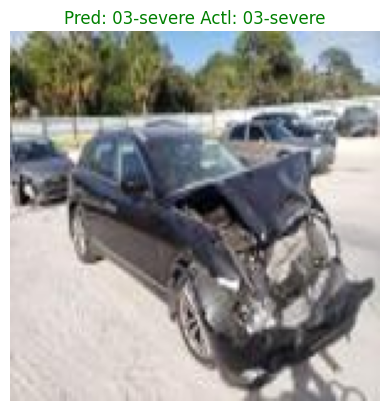

1/1 [==============================] - 0s 36ms/step


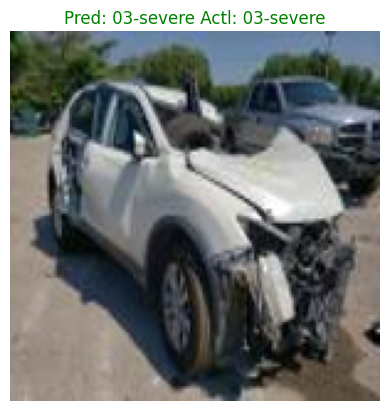

1/1 [==============================] - 0s 39ms/step


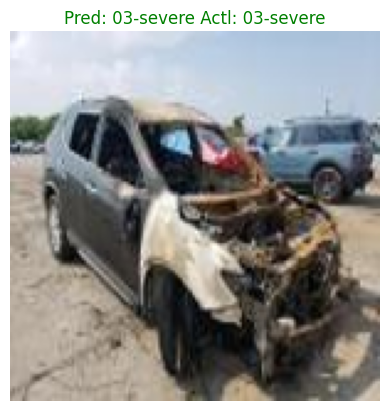

1/1 [==============================] - 0s 37ms/step


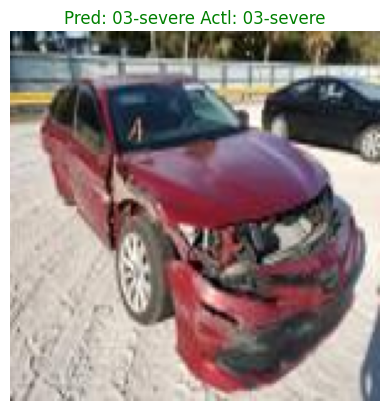

1/1 [==============================] - 0s 38ms/step


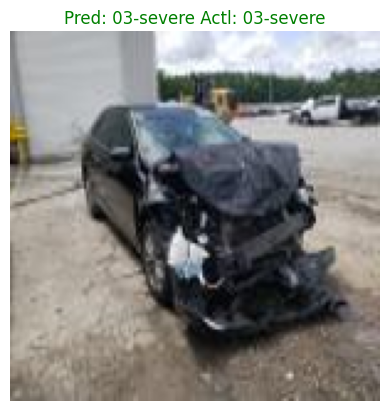

1/1 [==============================] - 0s 39ms/step


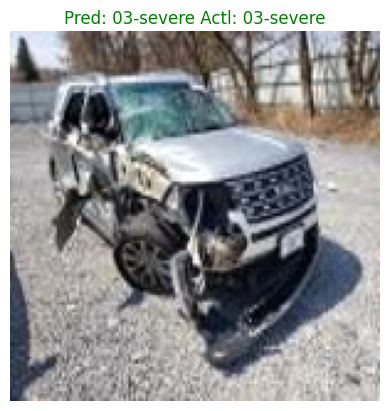

1/1 [==============================] - 0s 28ms/step


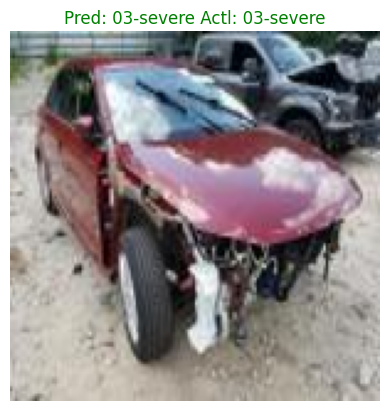

False: 6
True: 16


In [13]:
val_dir = 'data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))